In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import struct
import sys
import random
from model.MET import *
from model.MET_Meta import *
import time

In [2]:
datafile = open('./data/lognormal.double','rb')
data = datafile.read(8)
data_len, = struct.unpack('d', data)
data_len = int(data_len)
data=[]
for i in tqdm(range(data_len)):
    data_bin = datafile.read(8)
    data_unix, = struct.unpack('d',data_bin)
    data.append(data_unix)
gaps = np.diff(data)

100%|██████████| 18500001/18500001 [00:14<00:00, 1282931.22it/s]


In [3]:
epsilon_list = list(range(25,400,25))
MET_Index_seg_num = []
MET_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    epsilon = epsilon_list[i]
    MET_Index = MET(epsilon)
    MET_Index.learn_index_lookahead(data)
    MET_Index_seg_num.append(MET_Index.seg_num)
    MET_Index_mae.append(MET_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

  0%|          | 0/18500001 [00:00<?, ?it/s]

11989 7.384423276517661


100%|██████████| 18500001/18500001 [00:40<00:00, 453814.23it/s]


3178 15.317230145014587


100%|██████████| 18500001/18500001 [00:43<00:00, 420496.61it/s]


1499 22.815880064006482


100%|██████████| 18500001/18500001 [00:42<00:00, 430367.89it/s]


835 29.78918087626049


100%|██████████| 18500001/18500001 [00:45<00:00, 409472.70it/s]


622 38.64337828954712


100%|██████████| 18500001/18500001 [00:46<00:00, 401915.75it/s]


483 45.72593758238175


100%|██████████| 18500001/18500001 [00:46<00:00, 398507.49it/s]


401 55.495542567808506


100%|██████████| 18500001/18500001 [00:47<00:00, 392630.19it/s]


348 55.79145601127265


100%|██████████| 18500001/18500001 [00:47<00:00, 386015.98it/s]


274 66.09330615711859


100%|██████████| 18500001/18500001 [00:45<00:00, 406705.41it/s]


252 76.09628210290367


100%|██████████| 18500001/18500001 [00:45<00:00, 405998.83it/s]


185 80.36767608823372


100%|██████████| 18500001/18500001 [00:43<00:00, 425103.12it/s]


184 82.47754202824098


100%|██████████| 18500001/18500001 [00:45<00:00, 409390.07it/s]


178 97.39715932988328


100%|██████████| 18500001/18500001 [00:47<00:00, 392745.96it/s]


171 100.96673092071725


100%|██████████| 18500001/18500001 [00:48<00:00, 383318.85it/s]

141 100.2201023124269


-46.17985343982776

In [4]:
#epsilon_list = list(range(25,400,25))
MET_Meta_Index_seg_num_withBound = []
MET_Meta_Index_mae_withBound = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    MET_Meta_Index = MET_Meta(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=1000,withBound=True)
    MET_Meta_Index.learn_index_lookahead(data)
    MET_Meta_Index_seg_num_withBound.append(MET_Meta_Index.seg_num)
    MET_Meta_Index_mae_withBound.append(MET_Meta_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

100%|██████████| 18500001/18500001 [00:49<00:00, 370060.02it/s]


12297 7.189201341124252


100%|██████████| 18500001/18500001 [00:48<00:00, 382730.05it/s]


3159 15.556287807768227


100%|██████████| 18500001/18500001 [00:51<00:00, 362171.53it/s]


1369 24.72914958220813


100%|██████████| 18500001/18500001 [00:51<00:00, 360357.21it/s]


772 33.63812693847962


100%|██████████| 18500001/18500001 [00:46<00:00, 395385.64it/s]


591 38.03908972761677


100%|██████████| 18500001/18500001 [00:42<00:00, 432962.67it/s]


394 46.551613753966826


100%|██████████| 18500001/18500001 [00:40<00:00, 455028.35it/s]


362 56.21025144809452


100%|██████████| 18500001/18500001 [00:41<00:00, 441022.37it/s]


227 66.03106956588813


100%|██████████| 18500001/18500001 [00:42<00:00, 433321.29it/s]


238 74.18123566587916


100%|██████████| 18500001/18500001 [00:42<00:00, 433726.94it/s]


183 77.15056793780714


100%|██████████| 18500001/18500001 [00:44<00:00, 415497.91it/s]


193 83.68373785493309


100%|██████████| 18500001/18500001 [00:44<00:00, 419408.50it/s]


172 99.39586473535866


100%|██████████| 18500001/18500001 [00:45<00:00, 409398.19it/s]


160 102.48531732511798


100%|██████████| 18500001/18500001 [00:44<00:00, 414391.48it/s]


155 104.0002199999881


100%|██████████| 18500001/18500001 [00:44<00:00, 415718.52it/s]

132 123.6407328842847


-47.13679189682007

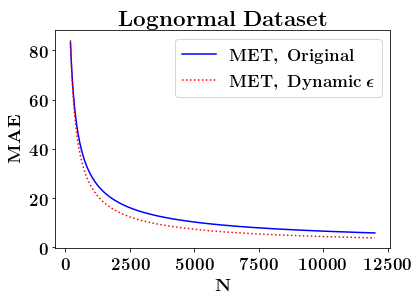

In [14]:
x = np.arange(200,12000)
import matplotlib.pylab as pylab
label_size = 18.5
ticks_size = 17
title_size = 22.5
legend_size = 17
params = {'legend.fontsize': legend_size,
          'axes.labelsize': label_size,
          'axes.titlesize': title_size,
          'xtick.labelsize': ticks_size,
          'ytick.labelsize': ticks_size}
pylab.rcParams.update(params)
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = [r'\boldmath']
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('$\mathrm{Lognormal~Dataset}$')
plt.xlabel('$\mathrm{N}$')
plt.ylabel('$\mathrm{MAE}$')
plt.xticks()
plt.yticks()
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,MET_Index_seg_num,MET_Index_mae)
p2,_ = curve_fit(func,MET_Meta_Index_seg_num_withBound[:],MET_Meta_Index_mae_withBound[:])
#p3,_ = curve_fit(func,PGM_Index_seg_num,PGM_Index_mae)
#p4,_ = curve_fit(func,MET_Meta_Index_seg_num_withBound,MET_Meta_Index_mae_withBound)
plt.plot(x,p1[0]*x**p1[1],c=colors[0], linestyle=linestyles[0], label='$\mathrm{MET,~Original}$')
#plt.scatter(MET_Index_seg_num[1:], MET_Index_mae[1:],c=colors[0],marker=markers[0])
plt.plot(x,p2[0]*x**p2[1],c=colors[1], linestyle=linestyles[1], label='$\mathrm{MET,~Dynamic~\epsilon}$')
#plt.scatter(MET_Meta_Index_seg_num_withBound[1:-2], MET_Meta_Index_mae_withBound[1:-2],c=colors[1],marker=markers[1])
plt.legend()
#plt.savefig("{}.pdf".format("results/MET/Lognormal_tradeoff_30"), bbox_inches='tight', pad_inches=0)

In [15]:
def calc_AUC(x,y):
    area=0
    for i in range(len(x)-1):
        area += (y[i]+y[i+1])*(x[i+1]-x[i]) / 2 
    return area
AUC1 = calc_AUC(x,p1[0]*x**p1[1])
AUC2 = calc_AUC(x,p2[0]*x**p2[1])
#AUC3 = calc_AUC(x,p3[0]*x**p3[1])
AUC1,AUC2,1-AUC2/AUC1

(150689.43738677108, 116668.43684594284, 0.2257689797693473)